In [24]:
#all imports
import numpy as np 
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy import signal

In [25]:
# system variables
Ap, Bp, Cp = 0.8, 1, 1
Am, Bm, Cm = 0.2, 0.2, 1

In [26]:
# learning rate
gamma = 20

In [27]:
# simulation configs
t_f = 20
step_time = 0.001
n_points = int(t_f/step_time)

In [28]:
# initial conditions
theta = np.zeros((n_points, 2))
omega = np.zeros((n_points, 2))

# sys plant x_m, y_m
x_m = np.zeros((n_points, 1))
y_m = np.zeros((n_points, 1))

# sys model x_p, y_p
x_p = np.zeros((n_points, 1))
y_p = np.zeros((n_points, 1))

#filtered signals
f_r = np.zeros((n_points, 1))
f_yp = np.zeros((n_points, 1))

error = np.zeros((n_points, 1))
error_aux = np.zeros((n_points, 1))

norm = np.zeros((n_points, 1))
sigma = np.zeros((n_points, 1))

Mtheta = 0.14


In [29]:
# signal
T, step = np.linspace(0, t_f, n_points, retstep=True)
print("step: ", step)
r = np.sin(0.2*np.pi*T)    #sinusoidal signal
# r = signal.square(0.2 * np.pi * T) #square signal
# r = signal.sawtooth(0.2 * np.pi * T) #sawtooth signal
# r = signal.step()
# control signal
u = np.zeros((n_points, 1))
u_filter = np.zeros((n_points, 1))

step:  0.001000050002500125


In [30]:
k = 0
np.array([float(f_r[k+1]), float(f_yp[k+1])])


array([0., 0.])

In [ ]:
# Main loop simulation for mrac control
K = 0.3
for k, z in enumerate(T):
    if(k < n_points - 1):
        # planta
        x_p[k + 1] = Ap*x_p[k] + Bp*u_filter[k]
        y_p[k + 1] = Cp*x_p[k]
        
        # ref
        x_m[k + 1] = Am*x_m[k] + Bm*r[k]
        y_m[k + 1] = Cm*x_m[k]

        # error 
        error[k] = y_p[k] - y_m[k]
        error_aux[k] = K*0.2*(u_filter[k] - u[k])

        norm_theta = LA.norm(theta[k])
        norm[k + 1] = norm_theta
        # print(norm_theta)
        sigmaeq = -gamma*(error[k] - error_aux[k])*(theta[k]).dot(omega[k])/(norm_theta**2)
        if norm_theta >= Mtheta and sigmaeq >= 0:
            sigma[k] = sigmaeq
        else:
            sigmaeq = 0
        theta[k + 1] = theta[k] + step*(-sigma[k]*theta[k] - gamma*error[k]*omega[k])
        
        #sinal y e r filtrados (filter r = f_r)
        f_r[k + 1] = -0.83*f_r[k] + 1.81*r[k]
        f_yp[k + 1] = -0.83*f_yp[k] + 1.81*y_p[k]
        omega[k + 1] = np.array([float(f_r[k+1]), float(f_yp[k+1])])
        
        # sinal de controle
        u[k + 1] =  np.sum(theta[k + 1]*np.array([r[k], -1*y_p[k]]))
        u_filter[k + 1] = np.sum(theta[k + 1]*np.array([f_r[k], f_yp[k]]))



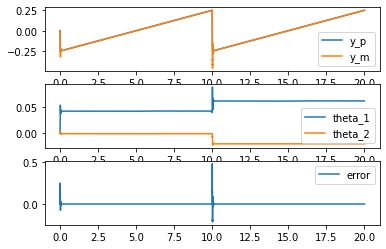

In [ ]:
#plots
#%matplotlib qt 

plt.subplot(3,1,1)
plt.plot(T, y_m, label="y_p")
plt.plot(T, y_p, label="y_m")
plt.legend()

plt.subplot(3,1,2)
# print(theta)
# plt.plot(error, T, label="error")
plt.plot(T, theta[:, 0], label='theta_1')
plt.plot(T, theta[:, 1], label='theta_2')
plt.legend()

# #plt.plot(z_a, error, label='error')
plt.subplot(3,1,3)
# print(theta)
# plt.plot(r, label='control_sig')
plt.plot(T, error, label="error")
# plt.plot(T, u, label='control_sig')
plt.legend()
plt.show()